# COSC 311 Final Exam_Spring 2024 (Part II)

Time limit: 100 minutes

Note: You need to **copy and paste your source code into the Answer Area after each question on MyClasses**. In addition, you also need to **upload this Jupyter Notebook file (".ipynb") with all your source code and test results** to the last task of this exam on MyClasses.

### Question 1 (15 points):

Use the attached file named "SciencePaper.txt", write a Python program to analyze this file and answer the following questions.

Task 1: How many different words appeared in this paper?

Task 2: What are the 10 words that appear most frequently (from high to low)?

Task 3: What are the appearance frequencies for the following words?

-	Summerfelt

-	wastewater

-	greenhouse

-	salmon

Task 4: What are the words appear exactly 1 time, 2 times, 5 times, and 10 times, respectively?

Task 5: Draw a bar figure to show the average length of words for each appearance frequency.

Note: you may use **file = open('SciencePaper.txt', 'r', errors='ignore')** to open the file if there is encoding/decoding error.

Number of Unique words: 1169
Top ten most frequent words (high to low)
('the', 151)
('to', 78)
('of', 73)
('and', 73)
('in', 72)
('a', 72)
('salmon', 56)
('fish', 46)
('is', 31)
('for', 31)
Below is the frequency of the following words
summerfelt - 15
wastewater - 6
greenhouse - 5
salmon - 56
Words That appear exactly 1 time: ['oceans', 'erik', 'stokstad', '09', 'feb', '2023:', '530-533', 'https://wwwscienceorg/content/article/oceans-away-raising-salmon-land-next-big-thing-farming-fish', 'northfield', 'wisconsin—when', 'drivers', 'highway', '94', 'pass', 'tiny', 'town', 'struck', 'mysterious', 'nocturnal', 'glow', 'pink', 'emanates', 'aquaponic', '2', 'greens', 'obvious', 'unique', 'scale', 'source', 'fertilize', 'crops:', 'flowing', 'teeming', 'silvery', 'indoors', 'bulk', 'winter', 'surrounding', 'farmland', 'blanketed', 'snow', 'steve', 'opened', 'door', 'hundreds', 'meter-long', 'swam', 'vigorously', 'house-size', 'overhead', 'crane', 'delivered', '1-ton', 'sack', 'automated', 'dis

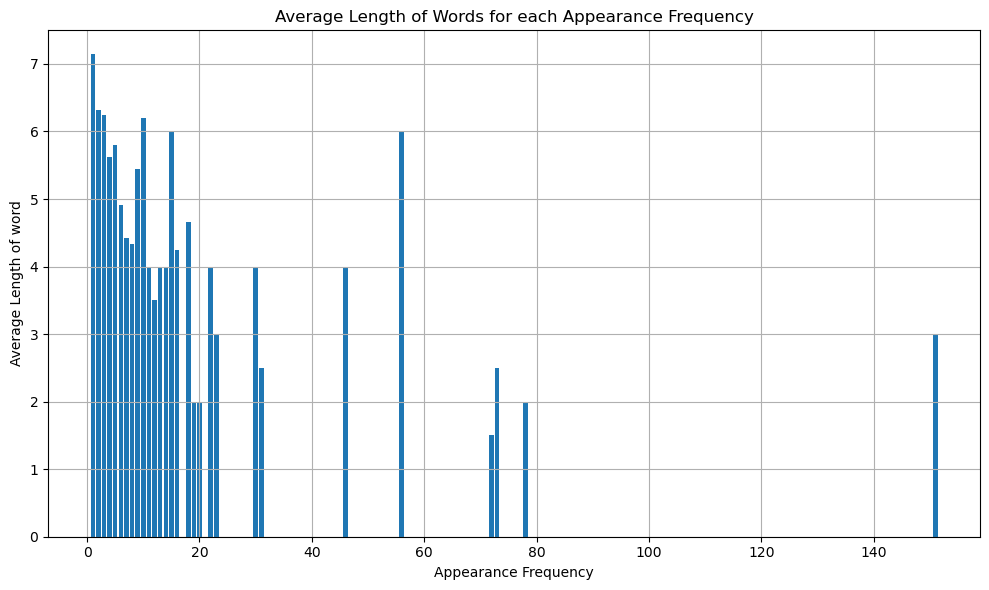

In [3]:
# Task 1
dictionary = {}
with open('SciencePaper.txt','r', encoding = "utf8") as file:
    for line in file:
        tokens = line.lower().replace(',','').replace(';','').replace('(','').replace(')','').replace('!','').replace('?','').replace('.','').split()
        for word in tokens:
            try:
                dictionary[word] += 1
            except:
                dictionary[word] = 1

print("Number of Unique words:", len(dictionary))

# Task 2
sorted_dictionary = sorted(dictionary.items(), reverse = True, key = lambda item: item[1])

print("Top ten most frequent words (high to low)")
for i in range(10):
    print(sorted_dictionary[i])

# Task 3
search_words = ["summerfelt", "wastewater", "greenhouse", "salmon"]

print("Below is the frequency of the following words")
for i in range(len(search_words)):
    print(search_words[i], "-", dictionary[search_words[i]])

# Task 4
reverse_dictionary = {} 

for word, count in dictionary.items():
    try:
        reverse_dictionary[count].append(word)
    except:
        reverse_dictionary[count] = [word]

print("Words That appear exactly 1 time:", reverse_dictionary[1])
print("Words That appear exactly 2 times:", reverse_dictionary[2])
print("Words That appear exactly 5 times:", reverse_dictionary[5])
print("Words That appear exactly 10 times:", reverse_dictionary[10])

# Task 5
import matplotlib.pyplot as plt

appearances = list(reverse_dictionary.keys())  
avg_len = [sum([len(word) for word in value]) / len(value) for value in reverse_dictionary.values()]

plt.figure(figsize=(10, 6))
plt.bar(appearances, avg_len)
plt.title('Average Length of Words for each Appearance Frequency')
plt.xlabel('Appearance Frequency')
plt.ylabel('Average Length of word')
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 2 (10 points):

Please use the "Housing Dataset" attached to finish the following tasks. **Each figure needs to show title, xlabel, and ylabel**.

Task 1: Draw a scatterplot figure to show the relationship between "total_bedrooms" and "median_house_value";

Task 2: Draw a bar figure to show the **maximum** "median_house_value" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

Task 3: Draw a histogram to show the "total_rooms" distribution in 8 bins for the "ISLAND" houses.


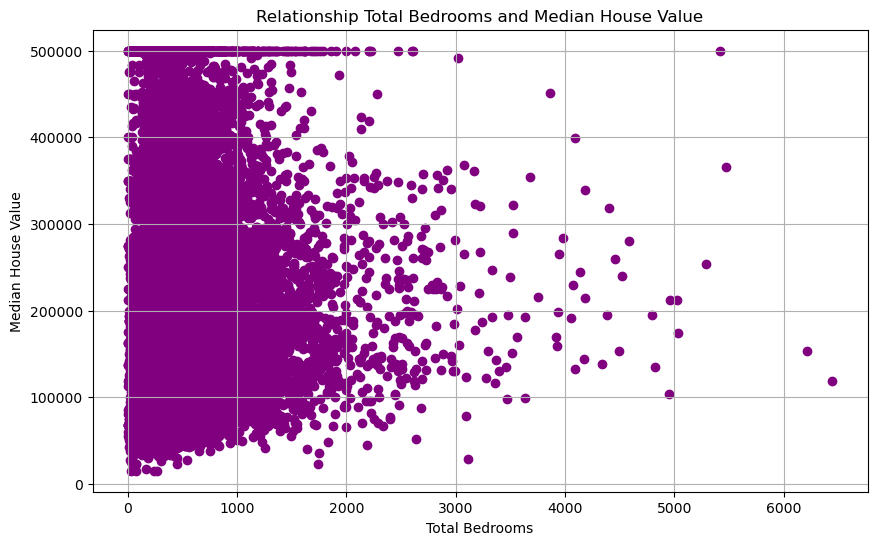

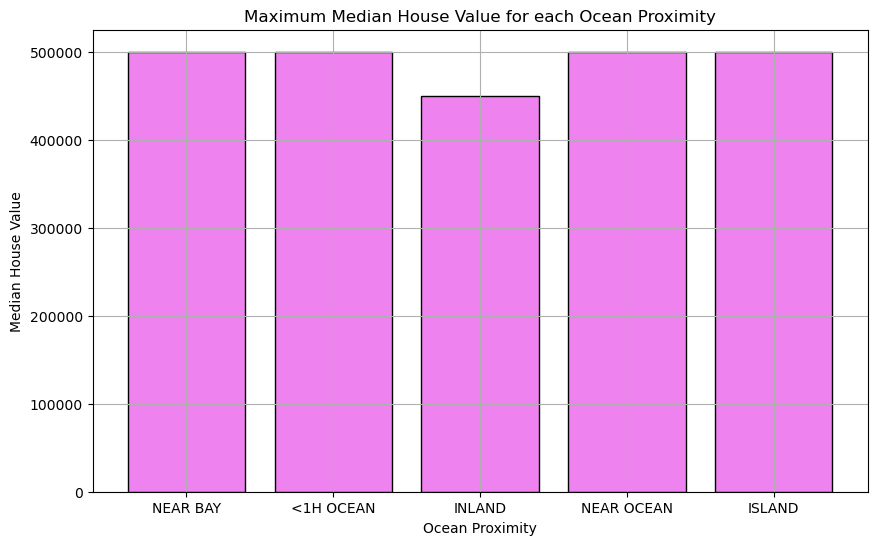

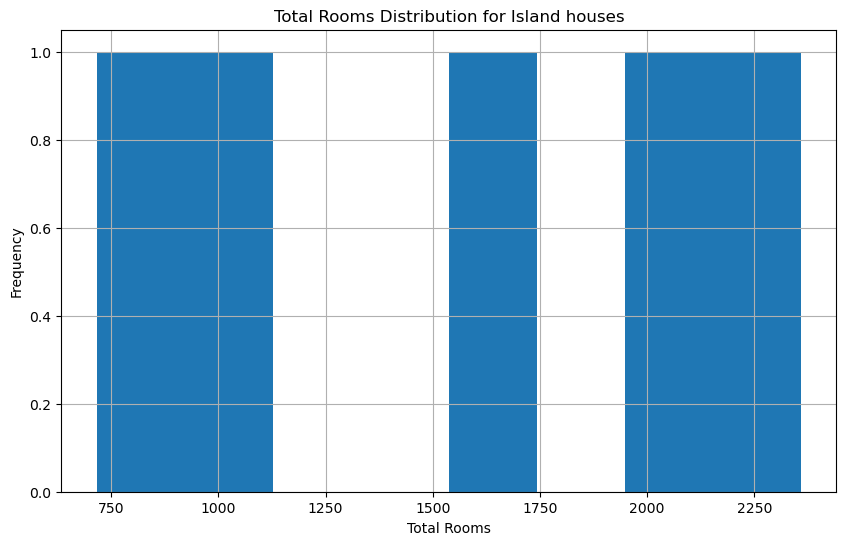

In [9]:
# Task 1
import pandas as pd

housing_data = pd.read_csv('housing.csv')

total_bedrooms = housing_data['total_bedrooms']
median_house_value = housing_data['median_house_value']

plt.figure(figsize=(10, 6))
plt.scatter(total_bedrooms, median_house_value, color='purple') 
plt.title('Relationship Total Bedrooms and Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Task 2
ocean_proximity_types = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'] 
max_med_house_value = housing_data.groupby('ocean_proximity')['median_house_value'].max()

plt.figure(figsize=(10, 6))
plt.bar(ocean_proximity_types, max_med_house_value, color='violet', edgecolor='black')
plt.title('Maximum Median House Value for each Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Task 3
plt.figure(figsize=(10, 6)) 
plt.hist(housing_data['total_rooms'][housing_data['ocean_proximity'] == 'ISLAND'], bins=8)
plt.title("Total Rooms Distribution for Island houses")
plt.xlabel('Total Rooms')
plt.ylabel('Frequency (# of houses)')
plt.grid(True)
plt.show()

### Question 3 (25 points):

Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. 

Task 1: Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 95% variance (i.e. the ratio of variance loss, η, is less than 5%). Assume m principal components are needed, transform the dataset to m dimensions.

Task 2: Randomly split the **transformed** dataset into two parts: 70% for training and 30% for testing. Use KNN classification algorithm to conduct experiments and find out the most appropriate parameter for *k (1 <= k <= 15)*. You need to draw a figure to show the accuracies for different values of *k*; Use the best *k* value selected, show the testing results using **Classification Report** and draw the **confusion matrix (in a figure)**;  

Task 3: Use the **WHOLE transformed** dataset, conduct a 10-fold cross validation test using Decision Tree algorithm (parameter setting: criterion is "entropy", max-depth is 25) and SVC algorithm (parameter setting: C is 5, kernel is "rbf", gamma is 0.01), respectively. Show the **test accuracy** and draw the corresponding **confusion matrix (in a figure)** for each classifier; 

Task 4: Using the **WHOLE transformed** dataset, conduct k-means clustering (k = 2, i.e., malignant and benign), 1) output the corresponding center of each cluster; 2) output the **clustering accuracy** (i.e. out of all samples, how many samples are correctly identified); 3) show the corresponding **confusion matrix** in a figure.

Number of principal components to keep at least 95% variance: 10
Best k and its accuracy score: (8, 0.9766081871345029)

Confusion Matrix:
 [[ 51   4]
 [  0 116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy Score: 0.9766081871345029


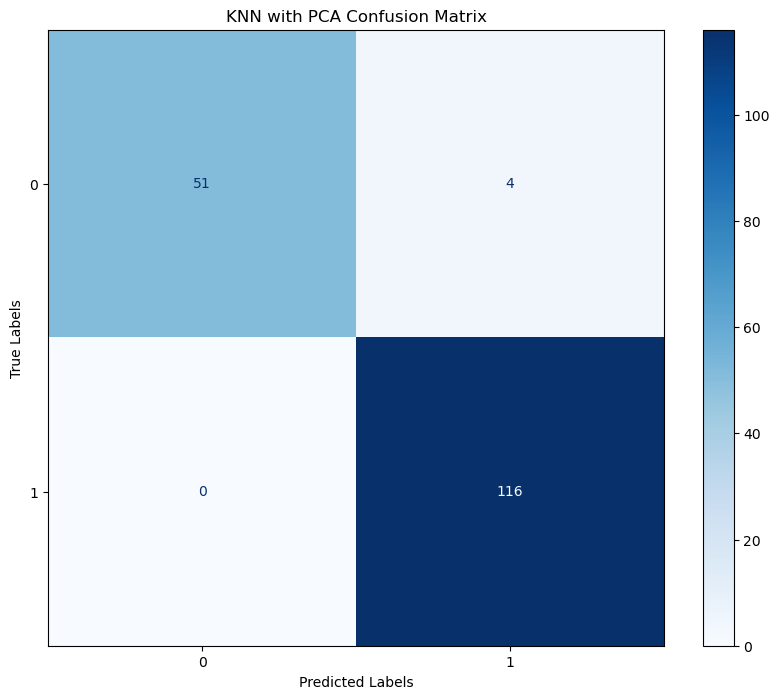

DT Avg accuracy: 0.943703007518797
SVC Avg accuracy: 0.6329260651629073


TypeError: Singleton array 0.943703007518797 cannot be considered a valid collection.

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode

# Print the confusion matrix, classification report, accuracy score, heatmap, and matrix display
def printResults(targetTest, prediction):
    confusionMatrix = confusion_matrix(targetTest, prediction)  # Create confusion matrix

    # Display the confusion matrix, a classification report, and the overall accuracy score of the prediction
    print("\nConfusion Matrix:\n", confusionMatrix)
    print("\nClassification Report:\n", classification_report(targetTest, prediction))
    print("Accuracy Score:", accuracy_score(targetTest, prediction))

    # Display a heatmap / confusion matrix using matplotlib and the sklearn toolset
    matrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    fig, ax = plt.subplots(figsize=(10, 8))  # Create layout and structure figure
    matrixDisplay.plot(ax=ax, cmap='Blues')  # Create Plot
    # Plot labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('KNN with PCA Confusion Matrix')
    plt.show()  # Display plot

dataset = datasets.load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

X = dataset['data']
y = dataset['target']

# Task 1

# Standardize the matrix
digits_mean = np.mean(X, axis=0)
digits_std = np.std(X, axis=0)
digits_std[digits_std == 0] = 1e-10  # Change stds of 0 to a small value to avoid division by zero
digits_normalized = (X - digits_mean) / digits_std

# Perform Principal Component Analysis (PCA) with normalized data
pca_normalized = PCA(n_components=0.95)
digits_data_new = pca_normalized.fit_transform(digits_normalized)

print(f"Number of principal components to keep at least 95% variance: {pca_normalized.n_components_}")

# Perform PCA
pca_final = PCA(n_components=pca_normalized.n_components_)
digits_data_transformed = pca_final.fit_transform(digits_normalized)

# Task 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_data_transformed, y, test_size=0.3, random_state=7)

k_scores = {}
for i in range(1,16):
    # Initialize the KNeighborsClassifier object
    knn_pca = KNeighborsClassifier(n_neighbors=i)  # Use number of samples in the training set as neighbors

    # Fit the model to the training data using the actual target labels
    knn_pca.fit(X_train, y_train)

    k_scores[i] = knn_pca.score(X_test, y_test)

sorted_dictionary = sorted(k_scores.items(), reverse = True, key = lambda item: item[1])

print("Best k and its accuracy score:", sorted_dictionary[0])

knn_pca = KNeighborsClassifier(n_neighbors=8)
knn_pca.fit(X_train, y_train)
predict = knn_pca.predict(X_test)
printResults(y_test, predict)

# Task 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=25)
svc = SVC(kernel='rbf', C=5, gamma=0.01, random_state=7)

# # Implementing cross validation
# k = 10  # number of fold
# kf = KFold(n_splits=k, random_state=None)

'''This was getting an error but is my attempt at task 3 ***Other way seems to work ... ignore commented code'''
# acc_score = []
 
# for train_index , test_index in kf.split(digits_data_transformed):
#     X_train, X_test = digits_data_transformed.iloc[train_index,:], digits_data_transformed.iloc[test_index,:]
#     y_train, y_test = y[train_index], y[test_index]
     
#     dt.fit(X_train, y_train)
#     pred_values = svc.predict(X_test)
     
#     acc = accuracy_score(pred_values, y_test)
#     acc_score.append(acc)
     
# avg_acc_score = sum(acc_score)/k

# print('accuracy of each fold using Decision Tree- {}'.format(acc_score))
# print('Avg accuracy using Decision Tree: {}'.format(avg_acc_score))

# # Implementing cross validation
# k = 10  # number of fold
# kf = KFold(n_splits=k, random_state=None)
 
# acc_score = []
 
# for train_index , test_index in kf.split(digits_data_transformed):
#     X_train, X_test = digits_data_transformed.iloc[train_index,:], digits_data_transformed.iloc[test_index,:]
#     y_train, y_test = y[train_index], y[test_index]
     
#     svc.fit(X_train, y_train)
#     pred_values = svc.predict(X_test)
     
#     acc = accuracy_score(pred_values, y_test)
#     acc_score.append(acc)
     
# avg_acc_score = sum(acc_score)/k

# print('accuracy of each fold using SVC- {}'.format(acc_score))
# print('Avg accuracy using SVC: {}'.format(avg_acc_score))
'''Trying this way instead'''
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, random_state=None)
 
dt_result = cross_val_score(dt , X, y, cv = kf)
svc_result = cross_val_score(svc , X, y, cv = kf)
 
print("DT Avg accuracy: {}".format(dt_result.mean()))
print("SVC Avg accuracy: {}".format(svc_result.mean()))

# Task 4
# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=7)
cluster_labels = kmeans.fit_predict(digits_data_transformed)

# Output the center of each cluster
print("Center of each cluster (each cluster represents a digit):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {center}")

# Determine the mapping between cluster labels and true labels 
mapped_labels = np.zeros_like(cluster_labels)
for cluster in range(kmeans.n_clusters):
    mask = (cluster_labels == cluster)
    mapped_labels[mask] = mode(y[mask])[0]

# Calculate and print clustering accuracy
print(f"Clustering Accuracy: {accuracy_score(y, mapped_labels):.6f}")

# Generate confusion matrix
confusionMatrix = confusion_matrix(y, cluster_labels)

# Visualize the confusion matrix using matplotlib and the sklearn toolset
matrixDisplay = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
fig, ax = plt.subplots(figsize=(10, 8))  # Create layout and structure figure
matrixDisplay.plot(ax = ax, cmap = 'Blues')  # Create Plot
# Plot labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Clustering Confusion Matrix')
plt.show()
